In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from altaipony.flarelc import FlareLightCurve
from altaipony.lcio import from_mast
import lightkurve as lk

In [17]:
full_raw = lk.search_lightcurve('TIC 441420236').download_all()
raw_lc = full_raw[2]
#raw_lc = test_raw.stitch()

raw_flc = FlareLightCurve(time=raw_lc.time, flux=raw_lc.flux)

C:\Users\Research\AppData\Local\Programs\Python\Python38\lib\site-packages\lightkurve\io\tess.py:34: ResourceWarning: unclosed file <_io.FileIO name='C:\\Users\\Research\\.lightkurve-cache\\mastDownload\\TESS\\tess2018206045859-s0001-0000000441420236-0120-s\\tess2018206045859-s0001-0000000441420236-0120-s_lc.fits' mode='rb' closefd=True>
  lc = read_generic_lightcurve(filename, flux_column=flux_column, time_format="btjd")
5% (982/19261) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5% (982/19261) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
C:\Users\Research\AppData\Local\Programs\Python\Python38\lib\site-packages\lightkurve\io\tess.py:34: ResourceWarning: unclosed file <_io.FileIO name='C:\\Users\\Research\\.lightkurve-cache\\mastDownload\\HLSP\\hlsp_tess-spoc_tess_phot_0000000441420236-s0001_tess_v1_tp\\hlsp_tess-spoc_tess_phot_0000000441420236-s0001_tess_v1_lc.fits' mode='rb' closefd=True>
  lc = read_generic_lightcu

In [18]:
flcd = raw_flc.detrend("savgol")

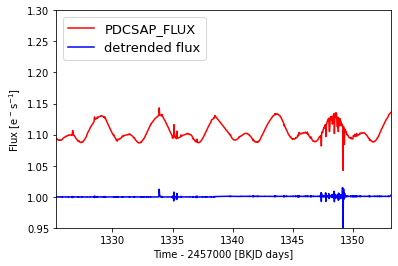

In [19]:
plt.plot(flcd.time.value, flcd.flux / np.nanmedian(flcd.flux)+0.1, c="r", 
         label="PDCSAP_FLUX")

plt.plot(flcd.time.value, flcd.detrended_flux / np.nanmedian(flcd.detrended_flux),
         "b", label="detrended flux")

plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(flcd.time.value[0], flcd.time.value[-1])
plt.ylim(.95,1.30)
plt.legend(loc=2,fontsize=13)

plt.show()

In [20]:
flcd = flcd.find_flares()
flcd.flares.sort_values(by="ed_rec", ascending=False)

Found 0 candidate(s) in the (0,629) gap.
Found 0 candidate(s) in the (629,1267) gap.


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur


In [22]:
raw_flc.detrended_flux = raw_flc.flux
raw_flc.detrended_flux_err = raw_flc.flux_err
raw_flc = raw_flc.find_flares()
raw_flc.flares.sort_values(by="ed_rec", ascending=False)

Found 0 candidate(s) in the (0,629) gap.
Found 0 candidate(s) in the (629,1267) gap.


,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur
